### 0.引入依赖


In [13]:
import numpy as np
import matplotlib.pyplot as plt

### 1.导入数据（data.csv）

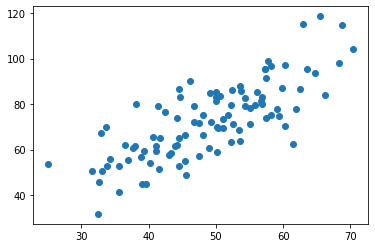

In [14]:
points = np.genfromtxt('data.csv' , delimiter = ',')
points[0,0]

#提取points中的两列分别作为X 和Y
x = points[:,0]
y = points[:,1]
# 用plt画出散点图
plt.scatter(x,y)
plt.show()


### 2.定义损失函数

In [15]:
#损失函数是系数的函数，另外传入数据的x,y
def compute_cost(w, b, points):
    total_cost = 0
    M = len(points)
    #逐点计算平方损失误差
    for i in range(M):
        x = points[i, 0]
        y = points[i, 1]
        total_cost += ( y-w*x-b)**2
        
    return total_cost/M

### 3.定义模型的超参数

In [16]:
alpha = 0.0001
initial_w = 0
initial_b = 0
num_iter = 10

### 4.定义核心梯度下降算法函数

In [17]:
def grad_desc(points, initial_w, initial_b, alpha, num_iter):
    w = initial_w
    b = initial_b
    
    #定义一个列表保存所有的损失函数值，佣来显示所有下降的过程
    cost_list = []
    
    for i in range(num_iter):
        cost_list.append(compute_cost(w,b,points))
        w,b = step_grad_desc(w,b,alpha,points)
    return [w, b, cost_list]

def step_grad_desc(current_w,current_b,alpha,points):
    sum_grad_w = 0
    sum_grad_b = 0
    M = len(points)
    
    #对每个点，带入公式去累加
    for i in range(M):
        x = points[i,0]
        y = points[i,1]
        sum_grad_w += (current_w * x + current_b -y)*x
        sum_grad_b += current_w*x+current_b-y
    
    #用公式求出当前的梯度
    grad_w = 2/M*sum_grad_w
    grad_b = 2/M*sum_grad_b
    
    #梯度下降，更新当前的w和b
    updated_w = current_w - alpha*grad_w
    updated_b = current_b - alpha*grad_b
    
    return updated_w, updated_b
    

### 5.测试：运行梯度下降算法计算最优的ｗ和ｂ

w is: 1.4774173755483797
b is: 0.02963934787473238
cost is: 112.65585181499748


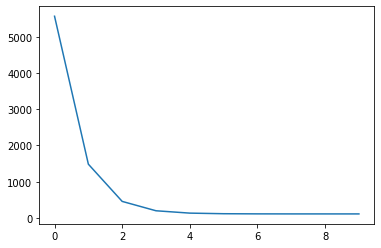

In [23]:
w ,b ,cost_list = grad_desc(points, initial_w, initial_b, alpha, num_iter)
print("w is:", w)
print("b is:", b)

cost = compute_cost(w, b, points)
print("cost is:", cost)

plt.plot(cost_list)
plt.show()

### 5.画出拟合曲线

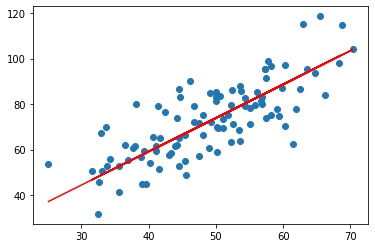

In [25]:
plt.scatter(x,y)
#针对每一个X，计算出预测的Y
pred_y = w*x+b

plt.plot(x,pred_y,c='r')
plt.show()